In [1]:
import pandas as pd


In [2]:
crop = pd.read_csv("CropData.csv")
crop.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


In [3]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [4]:
crop.describe()

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
count,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,31364.666735,1620.537755,98.086735
std,13561.435306,20095.783569,1104.990472,245.293123
min,5483.540000,7868.640000,85.790000,1.320000
25%,12774.410000,19259.840000,732.620000,9.590000
50%,17022.000000,25909.050000,1595.560000,13.700000
75%,24731.060000,35423.480000,2228.970000,36.610000
max,66335.060000,91442.630000,5777.480000,1015.450000


In [5]:
%matplotlib inline

In [6]:
import matplotlib as plt

array([[<AxesSubplot: title={'center': 'Cost of Cultivation (`/Hectare) A2+FL'}>,
        <AxesSubplot: title={'center': 'Cost of Cultivation (`/Hectare) C2'}>],
       [<AxesSubplot: title={'center': 'Cost of Production (`/Quintal) C2'}>,
        <AxesSubplot: title={'center': 'Yield (Quintal/ Hectare)'}>]],
      dtype=object)

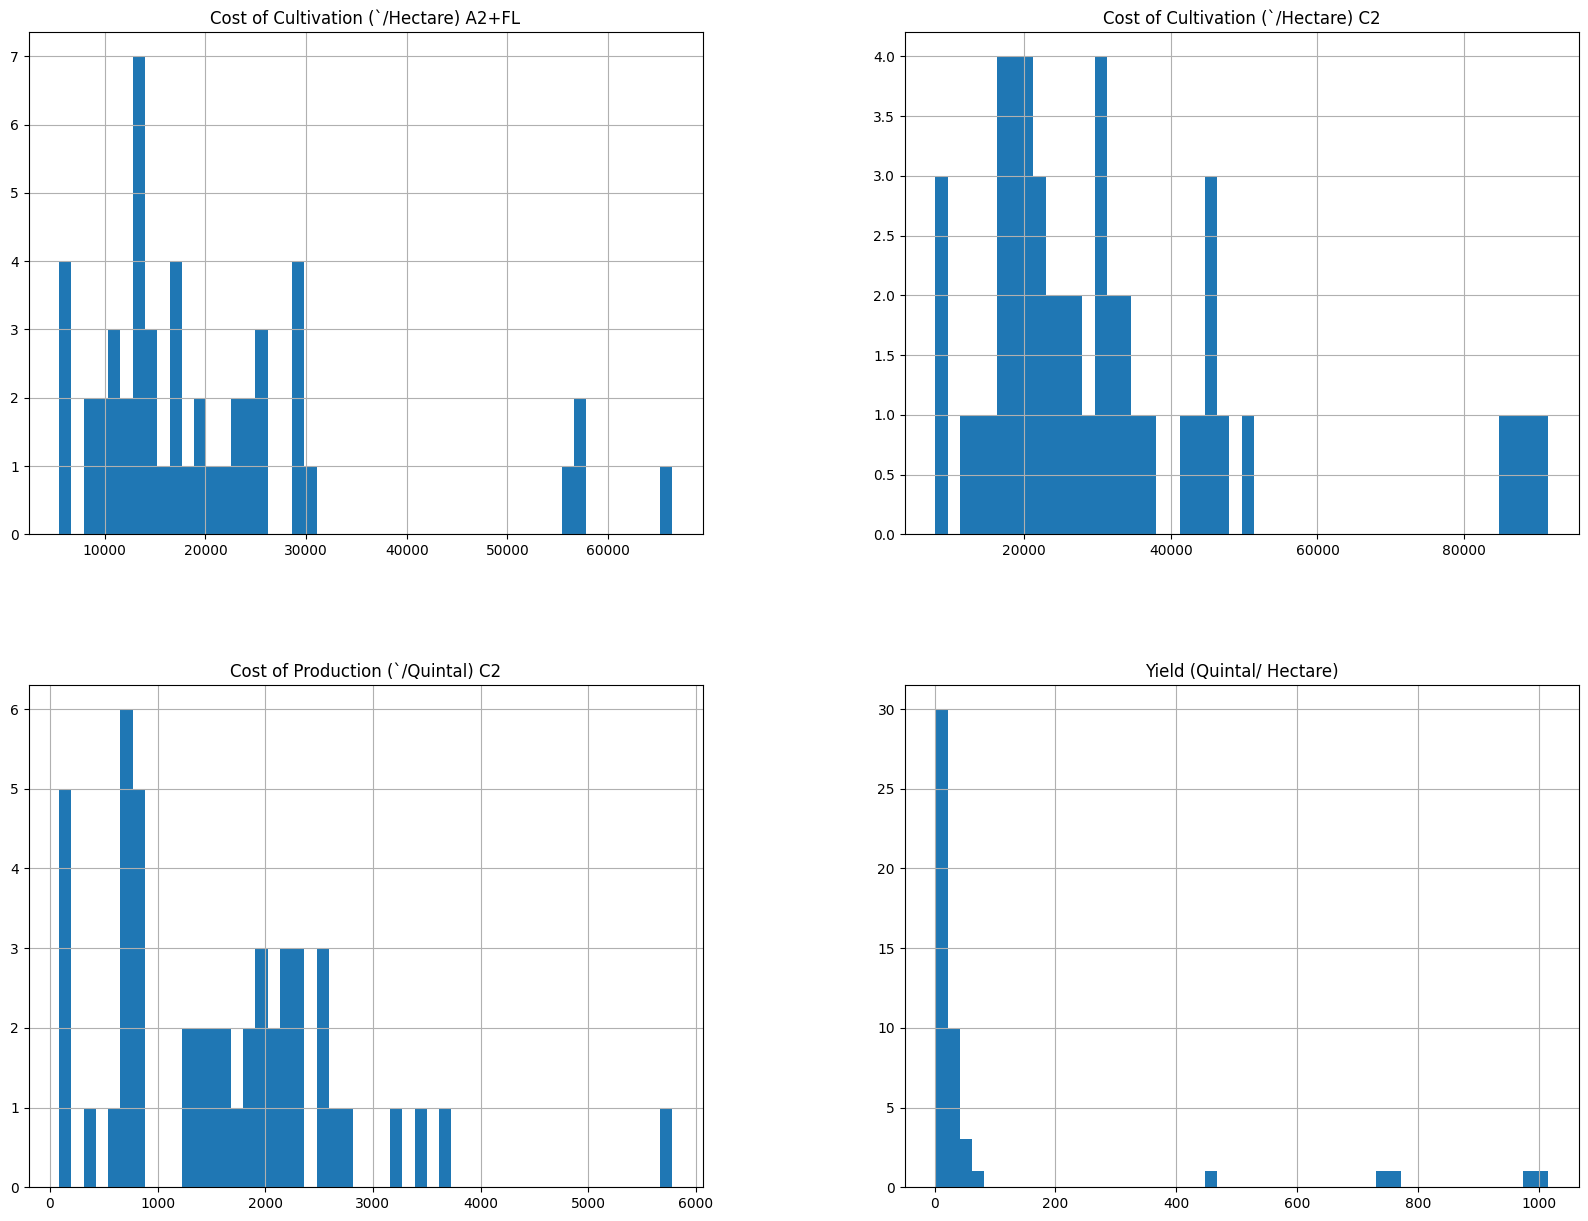

In [7]:
crop.hist(bins=50 ,figsize=(20,15))

In [8]:
import numpy as np

### Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
crop2 = crop[["Crop","State"]]
le = LabelEncoder()

In [10]:
Crop_encode = le.fit_transform(crop2["Crop"])

In [11]:
State_encode = le.fit_transform(crop2["State"])

In [12]:
crop["Crop"] = Crop_encode

In [13]:
crop["State"] = State_encode

In [14]:
crop.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,0,11,9794.05,23076.74,1941.55,9.83
1,0,4,10593.15,16528.68,2172.46,7.47
2,0,2,13468.82,19551.90,1898.30,9.59
3,0,0,17051.66,24171.65,3670.54,6.42
4,0,6,17130.55,25270.26,2775.80,8.72


In [15]:
crop["State"].value_counts()

0     8
11    7
6     6
4     5
9     5
2     4
8     3
5     3
3     2
10    2
7     2
1     1
12    1
Name: State, dtype: int64

# Test spliting


In [16]:
from sklearn.model_selection import train_test_split
train_set ,test_set = train_test_split(crop , test_size = 0.2 , random_state = 42)
print(f"Rows in test set:{len(test_set)}\nRows in train set: {len(train_set)}\n")

Rows in test set:10
Rows in train set: 39



In [17]:
from sklearn.model_selection import ShuffleSplit
split = ShuffleSplit(n_splits=1 ,test_size = 0.2, random_state = 4)
for train_index ,test_index in split.split(crop, crop['Cost of Cultivation (`/Hectare) C2']):
    strat_train_set = crop.loc[train_index]
    strat_test_set = crop.loc[test_index]

# Looking for correlations

In [18]:
corr_matrix = crop.corr()

In [19]:
corr_matrix['Cost of Cultivation (`/Hectare) C2'].sort_values(ascending=False)# strong positive correlation

Cost of Cultivation (`/Hectare) C2       1.000000
Cost of Cultivation (`/Hectare) A2+FL    0.981225
Yield (Quintal/ Hectare)                 0.866424
Crop                                     0.319807
State                                   -0.077246
Cost of Production (`/Quintal) C2       -0.497092
Name: Cost of Cultivation (`/Hectare) C2, dtype: float64

array([[<AxesSubplot: xlabel='Crop', ylabel='Crop'>,
        <AxesSubplot: xlabel='State', ylabel='Crop'>,
        <AxesSubplot: xlabel='Cost of Cultivation (`/Hectare) A2+FL', ylabel='Crop'>,
        <AxesSubplot: xlabel='Yield (Quintal/ Hectare)', ylabel='Crop'>,
        <AxesSubplot: xlabel='Cost of Cultivation (`/Hectare) C2', ylabel='Crop'>,
        <AxesSubplot: xlabel='Cost of Production (`/Quintal) C2', ylabel='Crop'>],
       [<AxesSubplot: xlabel='Crop', ylabel='State'>,
        <AxesSubplot: xlabel='State', ylabel='State'>,
        <AxesSubplot: xlabel='Cost of Cultivation (`/Hectare) A2+FL', ylabel='State'>,
        <AxesSubplot: xlabel='Yield (Quintal/ Hectare)', ylabel='State'>,
        <AxesSubplot: xlabel='Cost of Cultivation (`/Hectare) C2', ylabel='State'>,
        <AxesSubplot: xlabel='Cost of Production (`/Quintal) C2', ylabel='State'>],
       [<AxesSubplot: xlabel='Crop', ylabel='Cost of Cultivation (`/Hectare) A2+FL'>,
        <AxesSubplot: xlabel='State', ylabel

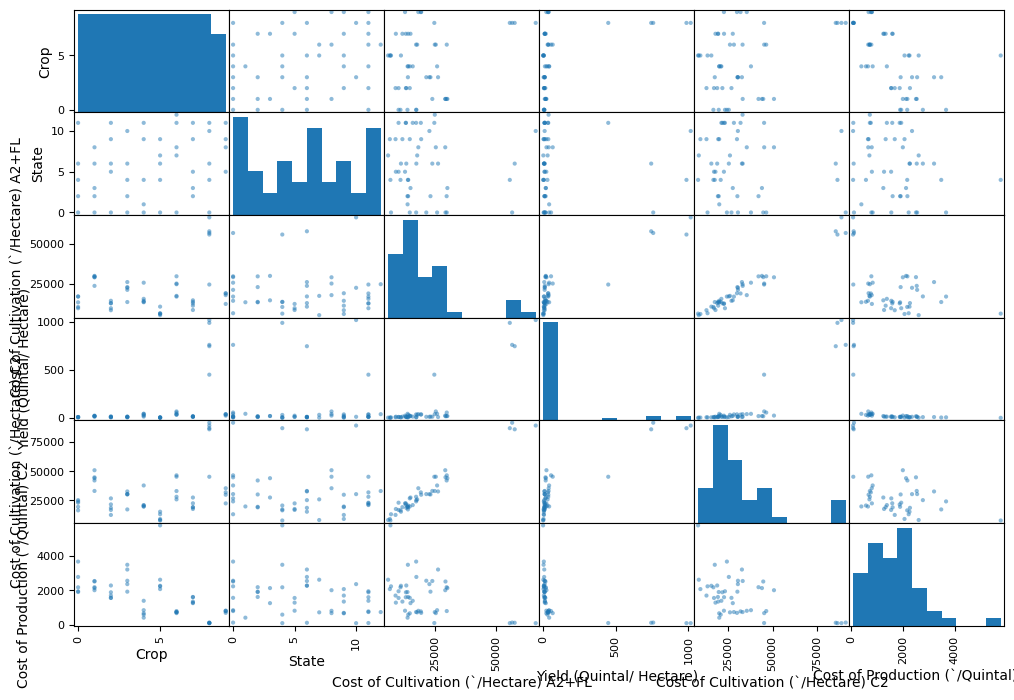

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["Crop","State","Cost of Cultivation (`/Hectare) A2+FL" ,"Yield (Quintal/ Hectare)","Cost of Cultivation (`/Hectare) C2","Cost of Production (`/Quintal) C2"]
scatter_matrix(crop[attributes], figsize = (12,8))

C:\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Cost of Production (`/Quintal) C2', ylabel='Cost of Cultivation (`/Hectare) A2+FL'>

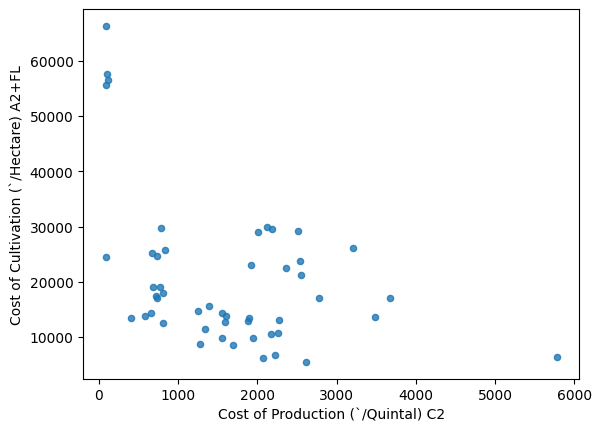

In [21]:
crop.plot(kind = "scatter" , x = "Cost of Production (`/Quintal) C2", y= "Cost of Cultivation (`/Hectare) A2+FL" ,alpha = 0.8)

In [22]:
crop = strat_train_set.drop('Cost of Production (`/Quintal) C2' , axis =1)
crop_labels = strat_train_set['Cost of Production (`/Quintal) C2'].copy()

# Trying out Attribute combinations

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(crop)


SimpleImputer(strategy='median')

In [24]:
imputer.statistics_

array([5.000000e+00, 6.000000e+00, 1.563543e+04, 2.676209e+04,
       1.370000e+01])

In [25]:
x = imputer.transform(crop)

In [26]:
crop_tr = pd.DataFrame(x , columns = crop.columns)

In [27]:
crop_tr.describe()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Yield (Quintal/ Hectare)
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,4.564103,5.538462,21089.777692,32277.904872,118.631538
std,2.760577,3.979197,14667.698032,21647.656938,271.759740
min,0.000000,0.000000,6204.230000,7868.640000,1.320000
25%,2.500000,2.000000,12880.180000,19171.695000,9.460000
50%,5.000000,6.000000,15635.430000,26762.090000,13.700000
75%,7.000000,9.000000,24942.905000,36612.665000,39.435000
max,9.000000,12.000000,66335.060000,91442.630000,1015.450000


# Creating a pipeline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer' ,SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [29]:
crop_num_tr = my_pipeline.fit_transform(crop)

In [30]:
crop_num_tr

array([[-0.20701356,  0.88128065, -0.46056913, -0.58346255, -0.35440995],
       [ 0.15996502, -1.41004904, -0.99496963, -0.89237639, -0.42024332],
       [ 0.5269436 ,  0.62668846,  0.28076058,  0.6090013 , -0.19094487],
       [-0.57399214, -0.39168029, -0.51405283, -0.70027519, -0.42467943],
       [-0.57399214, -1.41004904,  0.00961653, -0.08626297, -0.39761543],
       [ 0.15996502, -0.39168029, -1.01179052, -1.14231087, -0.43731676],
       [ 0.89392218,  1.39046503, -0.57432802, -0.4547669 , -0.39165091],
       [-0.20701356, -1.15545685, -0.52325134, -0.58124385, -0.28212745],
       [-0.20701356, -1.41004904,  0.31752838,  0.25851096, -0.28313396],
       [ 1.62787934,  0.88128065, -0.13611267, -0.1123881 , -0.30359971],
       [-0.94097072,  0.11750409, -0.55971732, -0.6363895 , -0.4122285 ],
       [-0.94097072,  0.88128065, -0.86591489, -0.92038374, -0.41677645],
       [-0.57399214,  0.11750409,  0.34457344,  0.01897927, -0.40745689],
       [ 0.15996502,  0.11750409, -0.7

# Selecting a desired model

In [31]:
crop_num_tr.shape


(39, 5)

#### LinearRegression Model

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(crop_num_tr ,crop_labels)

LinearRegression()

In [33]:
some_data = crop.iloc[:5]

In [34]:
some_labels = crop_labels.iloc[:5]

In [35]:
prepared_data = my_pipeline.transform(some_data)

In [36]:
model.predict(prepared_data)

array([1949.76152207, 2158.34524362,  441.94485049, 2475.97971767,
       2194.78995497])

In [37]:
list(some_labels)


[658.77, 2228.97, 669.86, 3484.01, 2554.91]

In [38]:
from sklearn.metrics import mean_squared_error
crop_prediction =model.predict(crop_num_tr)
lin_mse = mean_squared_error(crop_labels ,crop_prediction)
lin_rmse = np.sqrt(lin_mse)

In [39]:
lin_mse

691442.9783086812

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,crop_num_tr ,crop_labels,scoring="neg_mean_squared_error" ,cv=10)
ramse_scores = np.sqrt(-scores)


In [41]:
ramse_scores

array([ 848.17680033, 2085.24218445,  643.1761282 ,  656.4349989 ,
        427.03084927,  646.38824251, 1015.75306849,  295.32205109,
        353.4427798 ,  536.71389279])

#### Decisiontree model

In [42]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(crop_num_tr ,crop_labels)

DecisionTreeRegressor()

In [43]:
some_data = crop.iloc[:5]

In [44]:
some_labels = crop_labels.iloc[:5]

In [45]:
prepared_data = my_pipeline.transform(some_data)

In [46]:
model.predict(prepared_data)

array([ 658.77, 2228.97,  669.86, 3484.01, 2554.91])

In [47]:
list(some_labels)


[658.77, 2228.97, 669.86, 3484.01, 2554.91]

In [48]:
from sklearn.metrics import mean_squared_error
crop_prediction =model.predict(crop_num_tr)
lin_mse = mean_squared_error(crop_labels ,crop_prediction)
lin_rmse = np.sqrt(lin_mse)

In [49]:
lin_mse

0.0

### Evaluating the model

#### Cross validation

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,crop_num_tr ,crop_labels,scoring="neg_mean_squared_error" ,cv=10)
rmse_scores = np.sqrt(-scores)


In [51]:
rmse_scores

array([ 675.92765425, 1779.53153676,  513.36439629,  589.58846703,
        127.3909101 ,  337.31211085,  335.73605742,  406.18070612,
        646.67686655,   87.20583008])

In [52]:
def print_scores(scores):
    print("scores:" , scores)
    print("Mean:", scores.mean())
    print("standard Deviation:" , scores.std())

In [53]:
print_scores(rmse_scores)

scores: [ 675.92765425 1779.53153676  513.36439629  589.58846703  127.3909101
  337.31211085  335.73605742  406.18070612  646.67686655   87.20583008]
Mean: 549.891453542764
standard Deviation: 452.15786380768196


In [54]:
print_scores(ramse_scores)

scores: [ 848.17680033 2085.24218445  643.1761282   656.4349989   427.03084927
  646.38824251 1015.75306849  295.32205109  353.4427798   536.71389279]
Mean: 750.768099582652
standard Deviation: 490.695426530016


# Random forest regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(crop_num_tr ,crop_labels)


RandomForestRegressor()

In [56]:
some_data = crop.iloc[:5]

In [57]:
some_labels = crop_labels.iloc[:5]

In [58]:
prepared_data = my_pipeline.transform(some_data)

In [59]:
model.predict(prepared_data)

array([1015.2378, 2507.5533,  655.3308, 3037.0446, 2483.808 ])

In [60]:
list(some_labels)


[658.77, 2228.97, 669.86, 3484.01, 2554.91]

In [61]:
from sklearn.metrics import mean_squared_error
crop_prediction =model.predict(crop_num_tr)
lin_mse = mean_squared_error(crop_labels ,crop_prediction)
lin_rmse = np.sqrt(lin_mse)

In [62]:
lin_mse

82806.43447489663

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,crop_num_tr ,crop_labels,scoring="neg_mean_squared_error" ,cv=10)
ranmse_scores = np.sqrt(-scores)

In [64]:
ranmse_scores

array([ 685.15991474, 1778.81788099,  382.92954852,  411.12884444,
        963.32766477,  392.00592079,  736.61036265,  300.33085592,
        524.53245107,  220.98518505])

In [65]:
def print_scores(scores):
    print("scores:" , scores)
    print("Mean:", scores.mean())
    print("standard Deviation:" , scores.std())

In [66]:
print_scores(ranmse_scores)

scores: [ 685.15991474 1778.81788099  382.92954852  411.12884444  963.32766477
  392.00592079  736.61036265  300.33085592  524.53245107  220.98518505]
Mean: 639.582862894927
standard Deviation: 435.5534144676184


# Final model

In [67]:
from joblib import dump ,load
dump(model, 'Cost.joblib')

['Cost.joblib']

# Testing the model

In [68]:
x_test = strat_train_set.drop('Cost of Production (`/Quintal) C2' , axis =1)
y_test = strat_train_set['Cost of Production (`/Quintal) C2'].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(list(final_predictions) , list(y_test))

[1015.2378000000004, 2507.5533000000014, 655.3308000000005, 3037.0446000000015, 2483.808000000002, 4455.196199999994, 1541.9445999999984, 569.7587000000004, 778.3263000000011, 700.1251000000011, 2239.212799999997, 2013.2239000000018, 2914.0799999999995, 2317.9820999999984, 103.78450000000002, 103.31930000000006, 2672.4840000000045, 744.8437000000002, 2367.4059000000007, 111.50790000000002, 729.6710000000005, 1742.4390999999998, 2105.1372999999967, 120.87459999999997, 1432.528800000001, 610.3108000000007, 2050.0174999999977, 3254.6951999999983, 1849.9824999999976, 1398.8287999999986, 744.1922000000008, 1380.6521999999986, 1946.4605000000013, 2098.3860000000022, 1583.957099999999, 210.9313999999999, 2182.9864999999972, 2409.7421000000013, 758.2752000000012] [658.77, 2228.97, 669.86, 3484.01, 2554.91, 5777.48, 1595.56, 404.43, 840.58, 683.58, 2277.68, 1691.66, 3207.35, 2261.24, 86.53, 85.79, 2068.67, 731.25, 2358.0, 107.56, 789.9, 1559.04, 1898.3, 119.72, 1279.6, 581.69, 1941.55, 3670.54,

In [69]:
final_rmse

287.76107185457977

In [70]:
prepared_data[0]

array([-0.20701356,  0.88128065, -0.46056913, -0.58346255, -0.35440995])